**Analyse de données**

ASSIENE Anne-Sophie

ANDRIAMIFIDY Laura

# **Projet : AIRBNB**

# --------------------------------------------INTRODUCTION --------------------------------------------

L'objectif de ce projet est de prédire le logarithme du prix du airbnb à partir d'un ensemble de caractéristiques brutes (type de logement, équipements, ville, etc...). Ces données nécessitent un prétraitement pour être exploitables par des algorithmes de machine learning. Nous disposons de deux fichiers : "airbnb_train.csv" qui sont les données d'entraînement et "airbnb_test.csv" qui sont les données de test pour évaluer le modèle.



La prédiction se fait sur le logarithme plutot que sur le prix brut car cela permet de réduire l'impact des valeurs extrêmes et normaliser la distribution, ce qui améliore la perdormance des modèles linéaires.

**Importation des Bibliothèques**

In [ ]:
# Manipulation des données
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

# Prétraitement
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (
    StandardScaler,
    OneHotEncoder,
    LabelEncoder
)

# Pipeline & Transformation
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Modèles de régression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from xgboost import XGBRegressor

# Séparation des données et tuning
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# Évaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Mesure du temps
import time


**Chargement des données**

In [ ]:
train = pd.read_csv('airbnb_train.csv')
test = pd.read_csv('airbnb_test.csv')

Le fichier train (entraînement) va permettre au modèle à reconnaitre des motifs dans les données. Quand au fichier test, cela va permettre d'évaluer la performance du modèle sur des données jamais vues.

#---------------------------------EXPLORATION QUALITATIVE---------------------------------

Avant toute modélisation, on réalise une analyse pour:


*   Comprendre les distributions des variables
*   Identifier les corrélations

*   Détecter les outliers

Cela va permettre de guidre les choix de prétraitement par la suite.




##**Aperçu initial des données**

In [ ]:
display(train)

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds
0,5708593,4.317488,House,Private room,"{TV,""Wireless Internet"",Kitchen,""Free parking ...",3,1.0,Real Bed,flexible,False,...,NaN,33.782712,-118.134410,Island style Spa Studio,Long Beach,0,NaN,90804,0.0,2.0
1,14483613,4.007333,House,Private room,"{""Wireless Internet"",""Air conditioning"",Kitche...",4,2.0,Real Bed,strict,False,...,2017-09-17,40.705468,-73.909439,"Beautiful and Simple Room W/2 Beds, 25 Mins to...",Ridgewood,38,86.0,11385,1.0,2.0
2,10412649,7.090077,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",6,2.0,Real Bed,flexible,False,...,NaN,38.917537,-77.031651,2br/2ba luxury condo perfect for infant / toddler,U Street Corridor,0,NaN,20009,2.0,2.0
3,17954362,3.555348,House,Private room,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1,1.0,Real Bed,flexible,True,...,2017-09-29,40.736001,-73.924248,Manhattan view from Queens. Lovely single room .,Sunnyside,19,96.0,11104,1.0,1.0
4,9969781,5.480639,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,moderate,True,...,2017-08-28,37.744896,-122.430665,Zen Captured Noe Valley House,Noe Valley,15,96.0,94131,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22229,11989532,4.605170,Apartment,Private room,{},1,1.0,Real Bed,flexible,False,...,NaN,40.709025,-73.939405,one room bushwick,Williamsburg,0,NaN,11206.0,1.0,1.0
22230,20652462,5.043425,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,2.0,Real Bed,moderate,True,...,2017-04-15,33.871549,-118.396053,Spacious Hermosa 2 BR on PCH,Hermosa Beach,16,93.0,90254,2.0,4.0
22231,12380210,5.220356,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",5,1.0,Real Bed,moderate,True,...,2017-09-10,40.706749,-73.942377,Modern 2 Bedroom Apartment in Williamsburg,Williamsburg,43,94.0,11206.0,2.0,2.0
22232,19533966,5.273000,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Real Bed,strict,True,...,NaN,40.738535,-74.000157,Designer's Apartment in HEART of NYC,West Village,0,NaN,10011,0.0,2.0


In [ ]:
# Informations sur le data set
train.shape
train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22234 entries, 0 to 22233
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      22234 non-null  int64  
 1   log_price               22234 non-null  float64
 2   property_type           22234 non-null  object 
 3   room_type               22234 non-null  object 
 4   amenities               22234 non-null  object 
 5   accommodates            22234 non-null  int64  
 6   bathrooms               22183 non-null  float64
 7   bed_type                22234 non-null  object 
 8   cancellation_policy     22234 non-null  object 
 9   cleaning_fee            22234 non-null  bool   
 10  city                    22234 non-null  object 
 11  description             22234 non-null  object 
 12  first_review            17509 non-null  object 
 13  host_has_profile_pic    22178 non-null  object 
 14  host_identity_verified  22178 non-null

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,2.223400e+04,22234.000000,22234.000000,22183.000000,22234.000000,22234.000000,22234.000000,17256.000000,22208.000000,22199.000000
mean,1.122269e+07,4.783481,3.155573,1.236037,38.462971,-92.269305,20.670774,94.069077,1.264769,1.711473
std,6.080480e+06,0.718758,2.143870,0.586246,3.071679,21.670081,37.183731,7.782235,0.852819,1.254903
min,3.362000e+03,2.302585,1.000000,0.000000,33.339002,-122.510940,0.000000,20.000000,0.000000,0.000000
25%,6.202924e+06,4.317488,2.000000,1.000000,34.136082,-118.340633,1.000000,92.000000,1.000000,1.000000
50%,1.217425e+07,4.700480,2.000000,1.000000,40.662632,-76.994944,6.000000,96.000000,1.000000,1.000000
75%,1.639502e+07,5.220356,4.000000,1.000000,40.746358,-73.954599,23.000000,100.000000,1.000000,2.000000
max,2.120450e+07,7.600402,16.000000,8.000000,42.390248,-70.989359,505.000000,100.000000,10.000000,18.000000


Ces premiers aperçus permettent de comprendre la structure des données en identifiant les colonnes, leurs types (numériques, textuelles,catégorielles). Nous avons égalementune idée de la distribution des variables numériques (moyenne, écart-type, minimum, maximum,...)

## **Visualisations clés**

### Analyse des variables catégorielles

Une variable catégorielle est une variable prenant un nombre limité de valeurs distinctes représentant des catégories ou des groupes. Pour chaque variable catégorielle nous traçons un graphique montrant sa distribution.

**Property type**


Distribution de property_type:
property_type
Apartment             0.658226
House                 0.223307
Condominium           0.037600
Townhouse             0.022803
Loft                  0.017136
Other                 0.008995
Guesthouse            0.007016
Bed & Breakfast       0.005847
Bungalow              0.004048
Villa                 0.002429
Dorm                  0.001934
Guest suite           0.001754
Timeshare             0.001304
Boat                  0.001169
Boutique hotel        0.001124
Camper/RV             0.001034
Cabin                 0.000989
In-law                0.000944
Hostel                0.000855
Tent                  0.000270
Castle                0.000225
Serviced apartment    0.000225
Vacation home         0.000180
Chalet                0.000135
Hut                   0.000135
Yurt                  0.000090
Cave                  0.000045
Tipi                  0.000045
Earth House           0.000045
Island                0.000045
Treehouse             0.

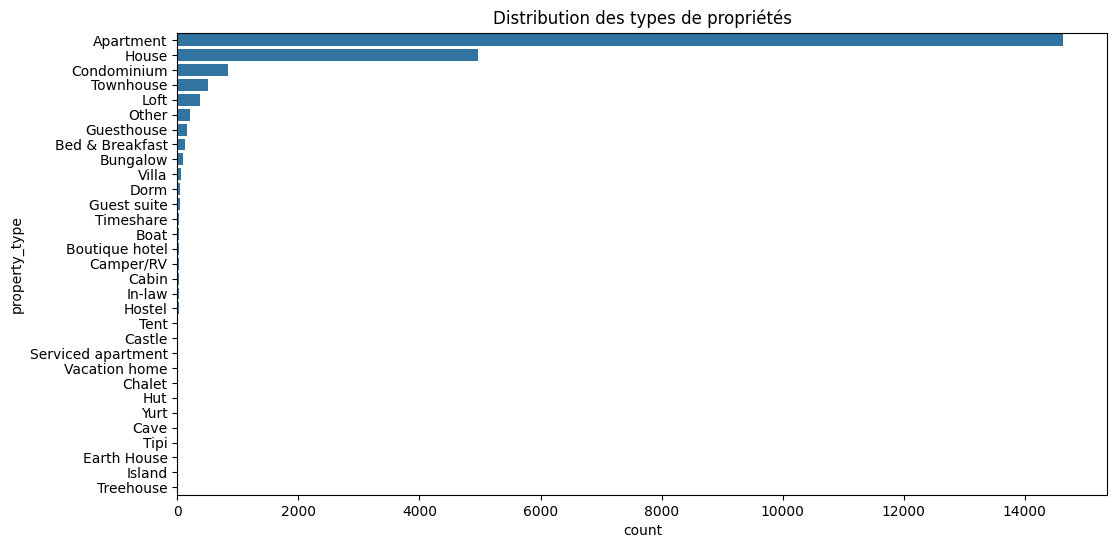

In [ ]:
print("\nDistribution de property_type:")
print(train['property_type'].value_counts(normalize=True))

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.countplot(y='property_type', data=train, order=train['property_type'].value_counts().index)
plt.title('Distribution des types de propriétés')
plt.show()

Ce graphique montre la distribution des types de logements. Nous pouvons voir que certains types comme "Apartment" et "House" dominent le dataset ce qui peut influencer la prédiction du prix.

**Room type**


Distribution de room_type:
room_type
Entire home/apt    0.555366
Private room       0.414635
Shared room        0.029999
Name: proportion, dtype: float64


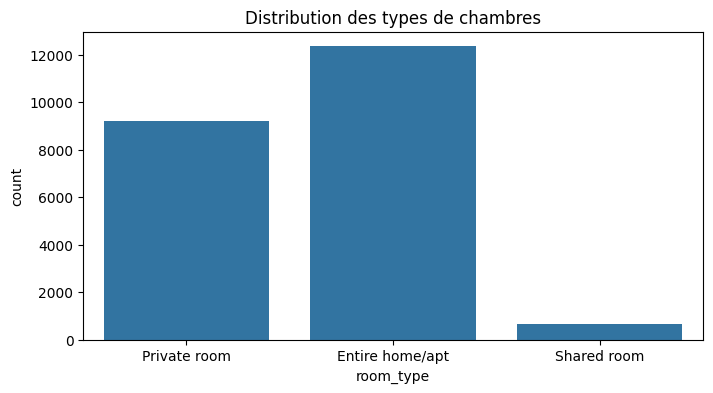

In [ ]:
print("\nDistribution de room_type:")
print(train['room_type'].value_counts(normalize=True))

plt.figure(figsize=(8,4))
sns.countplot(x='room_type', data=train)
plt.title('Distribution des types de chambres')
plt.show()

Ce graphique montre la distribution des types de chambres. Nous pouvons voir que certains types comme "Private room" et "Entire home/apt room_type" dominent le dataset tandis que "shared room" est une catégorie rare qu'il faudra peut-être regrouper ou exclure pour éviter de biaiser le modèle.

**Bed type**


Distribution de bed_type:
bed_type
Real Bed         0.972475
Futon            0.009985
Pull-out Sofa    0.007286
Airbed           0.006567
Couch            0.003688
Name: proportion, dtype: float64


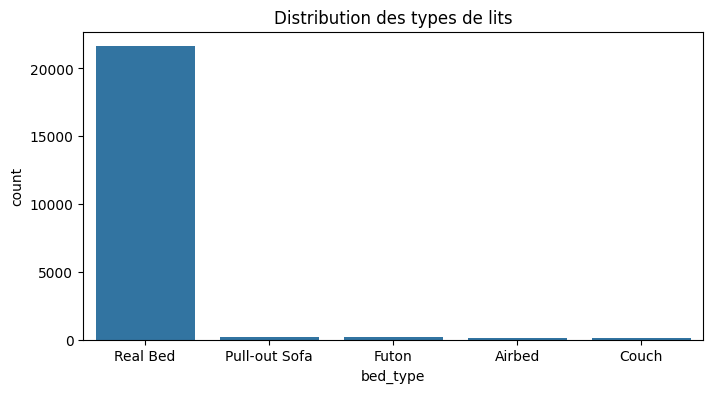

In [ ]:
print("\nDistribution de bed_type:")
print(train['bed_type'].value_counts(normalize=True))

plt.figure(figsize=(8,4))
sns.countplot(x='bed_type', data=train)
plt.title('Distribution des types de lits')
plt.show()

Celui-ci montre la distribution des types de lits. Nous pouvons voir que les catégories rares à regrouper ou exclure sont "Pull-out Sofa", "Futon bed_type", "Airbed", "Couch".

**Cancellation policy**


Distribution de cancellation_policy:
cancellation_policy
strict             0.437438
flexible           0.303769
moderate           0.256904
super_strict_30    0.001664
super_strict_60    0.000225
Name: proportion, dtype: float64


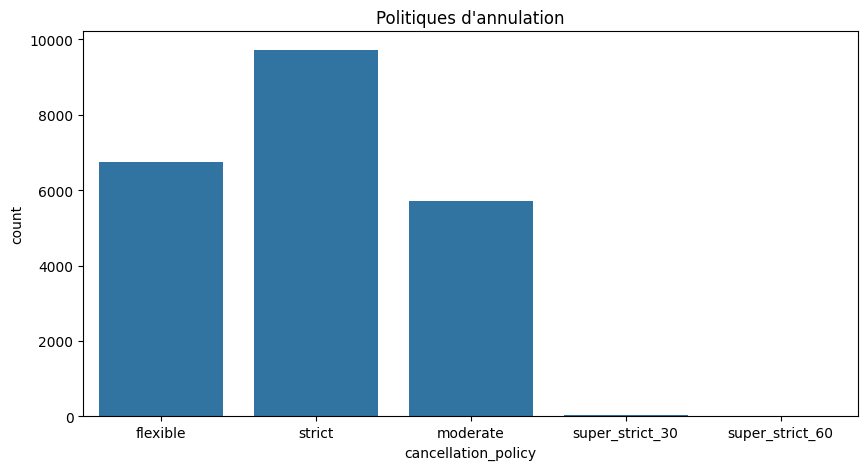

In [ ]:
print("\nDistribution de cancellation_policy:")
print(train['cancellation_policy'].value_counts(normalize=True))

plt.figure(figsize=(10,5))
sns.countplot(x='cancellation_policy', data=train)
plt.title('Politiques d\'annulation')
plt.show()

Ce graphique montre la distribution des politiques d'annulation.Les politiques d'annulation peuvent influencer le prix, la catégorie la plus présente est une politique "strict".

**City**


Distribution par ville:
city
NYC        0.438023
LA         0.300081
SF         0.086534
DC         0.078438
Chicago    0.050688
Boston     0.046235
Name: proportion, dtype: float64


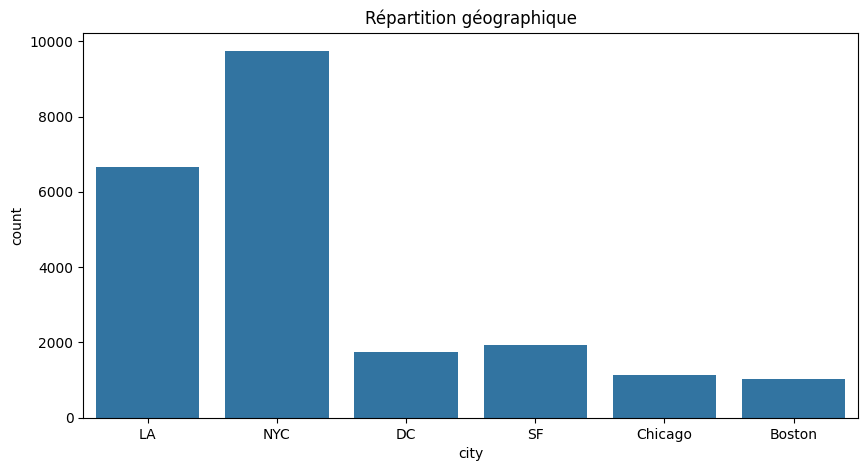

In [ ]:
print("\nDistribution par ville:")
print(train['city'].value_counts(normalize=True))

plt.figure(figsize=(10,5))
sns.countplot(x='city', data=train)
plt.title('Répartition géographique')
plt.show()

Ce graphique montre la distribution des villes. La répartition géographique est cruciale car les prix peuvent varier énormément selon la localisation.

**Host characteristics**


Profil des hôtes:
Photo de profil:
host_has_profile_pic
t    0.996844
f    0.003156
Name: proportion, dtype: float64

Identité vérifiée:
host_identity_verified
t    0.674227
f    0.325773
Name: proportion, dtype: float64


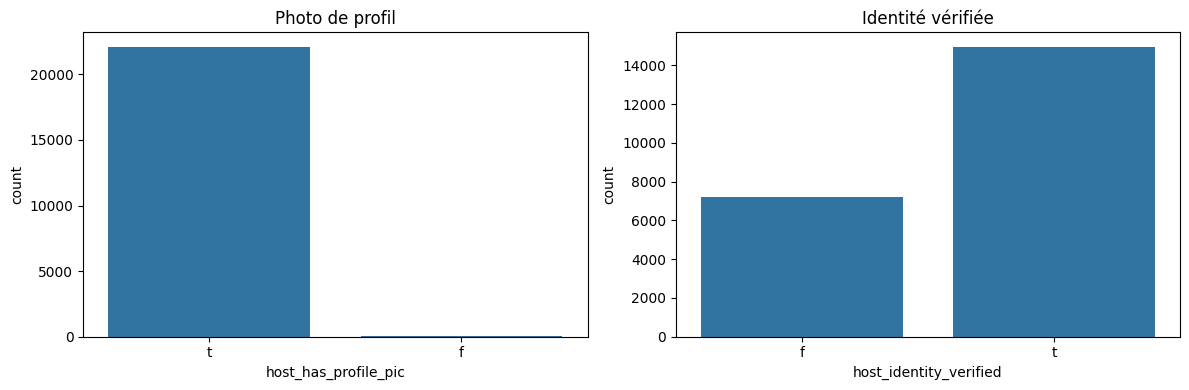

In [ ]:
print("\nProfil des hôtes:")
print("Photo de profil:")
print(train['host_has_profile_pic'].value_counts(normalize=True))

print("\nIdentité vérifiée:")
print(train['host_identity_verified'].value_counts(normalize=True))

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(x='host_has_profile_pic', data=train)
plt.title('Photo de profil')
plt.subplot(1,2,2)
sns.countplot(x='host_identity_verified', data=train)
plt.title('Identité vérifiée')
plt.tight_layout()
plt.show()

Ce graphique montre la distribution des 2 caractéristiques de l'hote : s'il a une photo de profil, si son identité est vérifié. La photo de profil et l'identité vérifiée sont des variables qui reflètent la crédibilité de l'hôte. En effet, un hôte ayant une photo et une identité vérifiée inspire davantage confiance et peut facturer plus cher.

**Instant bookable**


Réservation instantanée:
instant_bookable
f    0.737654
t    0.262346
Name: proportion, dtype: float64


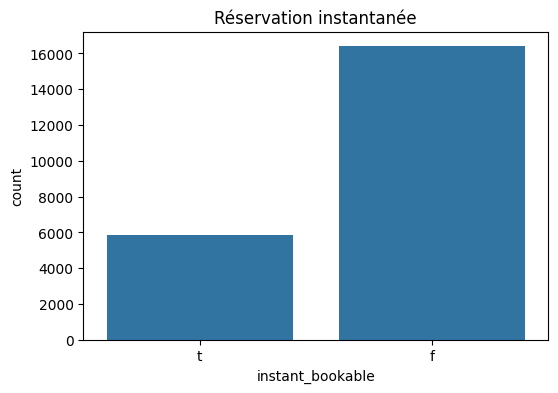

In [ ]:
print("\nRéservation instantanée:")
print(train['instant_bookable'].value_counts(normalize=True))

plt.figure(figsize=(6,4))
sns.countplot(x='instant_bookable', data=train)
plt.title('Réservation instantanée')
plt.show()

Ce graphique montre la distribution des réservations instantanées. Les logements réservables immédiatement peuvent attirer davantage de clients,ce qui influence potentiellement les prix.

### Analyse des variables textuelles

Une variable textuelle est une variable dont les valeurs sont compososées de chaînes de caractères. Elle sert à représenter des informations descriptives. Nous en avons qu'une : "Amenities".

**Amenities**

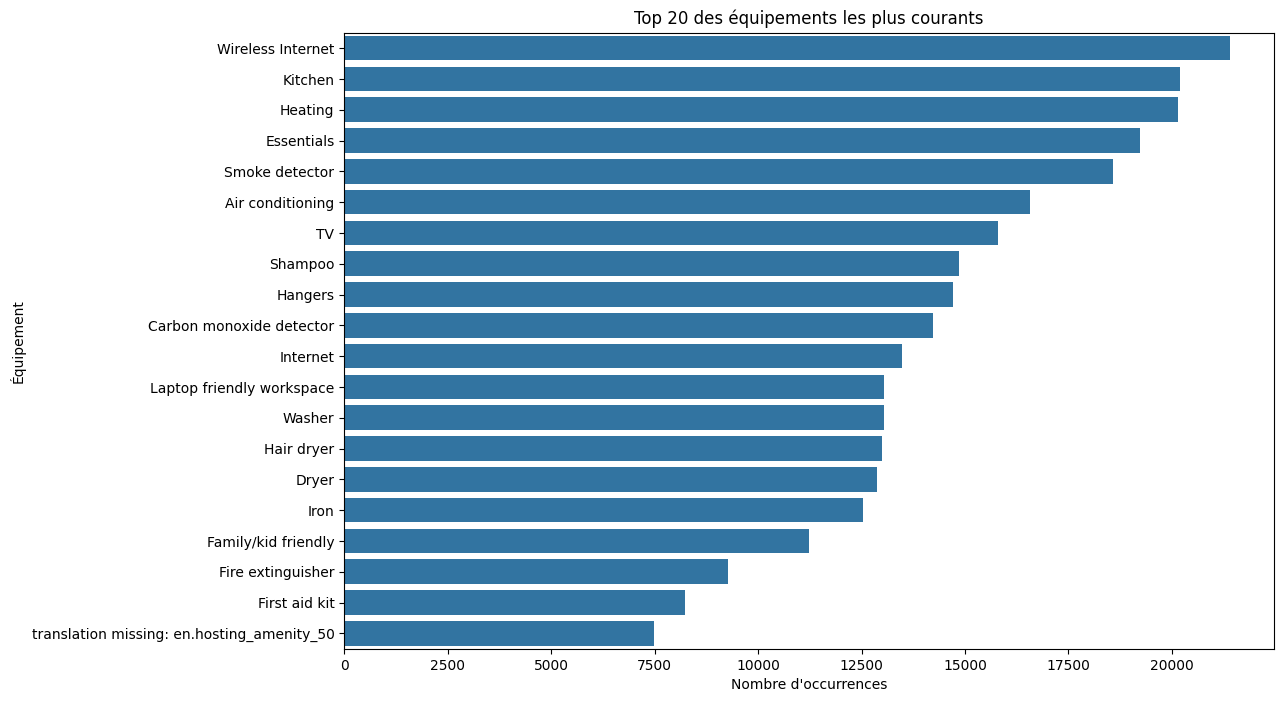

In [ ]:
import ast
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

def parse_amenities(amenity_str):
    """Fonction robuste pour parser les équipements"""
    try:
        return ast.literal_eval(amenity_str)
    except:
        try:
            cleaned = amenity_str.replace('""', '"').replace("'", '"')
            return json.loads(cleaned)
        except:
            return [item.strip(' "\'') for item in amenity_str.strip('{}').split(',')]

# Application au DataFrame
train['amenities_list'] = train['amenities'].apply(parse_amenities)

train['amenities_count'] = train['amenities_list'].apply(len)

all_amenities = [item for sublist in train['amenities_list'] for item in sublist]
amenities_counts = Counter(all_amenities)

# Top 20 des équipements
top_amenities = amenities_counts.most_common(20)

plt.figure(figsize=(12, 8))
sns.barplot(x=[count for amenity, count in top_amenities],
            y=[amenity for amenity, count in top_amenities])
plt.title('Top 20 des équipements les plus courants')
plt.xlabel('Nombre d\'occurrences')
plt.ylabel('Équipement')
plt.show()

Ce graphique montre la distribution des équipements : pour chaque équipement, on compte combien un logement en propose. Ce top 20 nous permet d'avoir l'ensemble des équipements les plus courants (wifi, cuisine, ...), très souvent corrélés au prix.

### Analyse des variables temporelles

Une variable temporelle représente un moment dans le temps. Dans nos cas, l'année est utilisé, cela permet d'analyser l'évolution d'un phénomène dans le temps.

**First review**

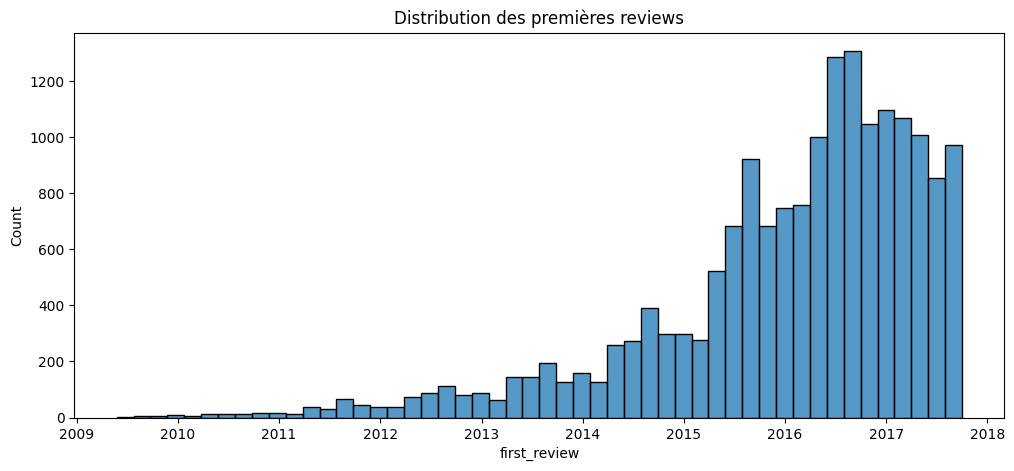

In [ ]:
# Conversion en datetime
train['first_review'] = pd.to_datetime(train['first_review'])

plt.figure(figsize=(12,5))
sns.histplot(train['first_review'], bins=50)
plt.title('Distribution des premières reviews')
plt.show()

Le nombre de premières reviews augmente fortement de manière exponentielle à partir de 2012-2013 avec un pic autour de 2016. Cela reflète l'expansion d'Airbnb sur le marché.

Avant 2012, il y a très peu de premières reviews probablement dû au fait qu'Airbnb était une plateforme à ses débuts.

Après 2016, le nombre de premières reviews diminue légèrement mais reste à un niveau élevé, probablement du à un ralentissement de l'ajout de nouveaux logements.

**Host since**

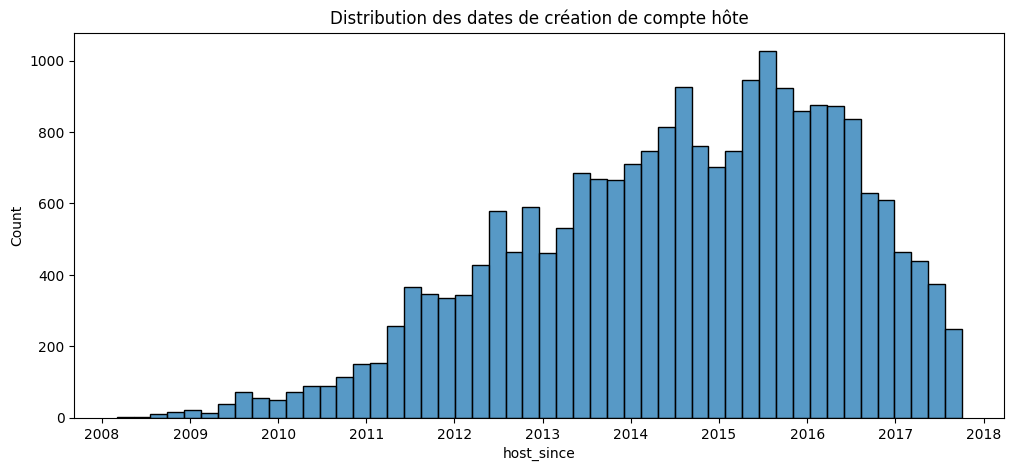

In [ ]:
# Conversion en datetime
train['host_since'] = pd.to_datetime(train['host_since'])

plt.figure(figsize=(12,5))
sns.histplot(train['host_since'], bins=50)
plt.title('Distribution des dates de création de compte hôte')
plt.show()

Le nombre de d'inscription des hotes augmente fortement de manière exponentielle à partir de 2012-2013 avec un pic autour de 2016. Cela reflète l'expansion d'Airbnb sur le marché.

Avant 2012, il y a très peu d'inscriptions.

Après 2016, le nombre d'inscriptions diminue, reflétant une possible saturation du marché ou consolidation des hotes les plus actifs.

### Matrices de corrélation

Les matrices de corrélation mettent en évidence les variables fortement liées.

**Entre variables qualitatives**

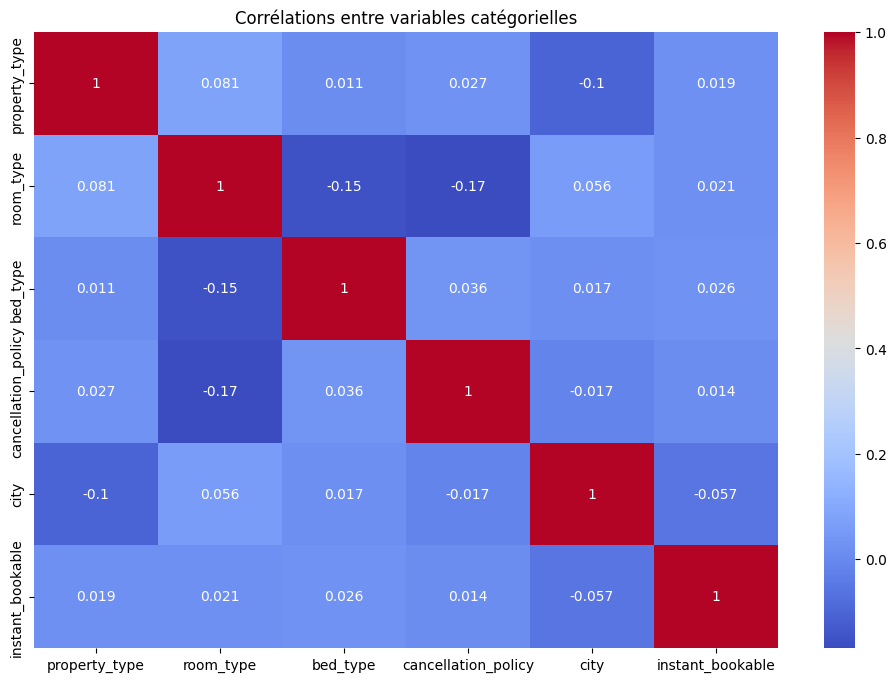

In [ ]:
# Matrice de corrélation pour certaines variables catégorielles
from sklearn.preprocessing import LabelEncoder

# Encodage des variables catégorielles
cat_vars = ['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'city', 'instant_bookable']
encoded = train[cat_vars].apply(LabelEncoder().fit_transform)

# Calcul de la matrice de corrélation
plt.figure(figsize=(12,8))
sns.heatmap(encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Corrélations entre variables catégorielles')
plt.show()

**Entre les variables numériques**

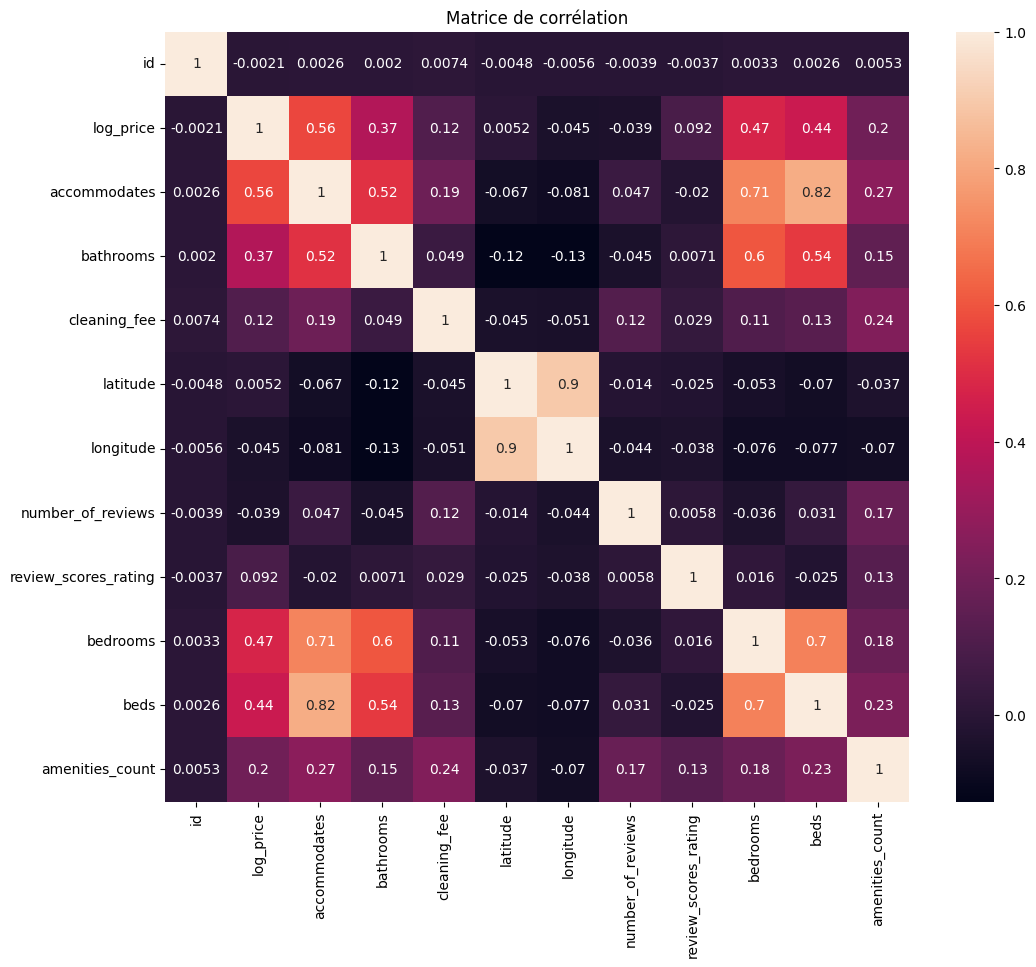

In [ ]:
plt.figure(figsize=(12, 10))
corr_matrix = train.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True)
plt.title("Matrice de corrélation")
plt.show()

### Corrélation entre les données

In [ ]:
def get_top_correlations(corr_matrix, n=20):
    # Créer une copie de la matrice et mettre les diagonales à zéro
    corr_matrix_copy = corr_matrix.copy()
    np.fill_diagonal(corr_matrix_copy.values, 0)

    # Transformer la matrice en série et trier par valeur absolue
    corr_series = corr_matrix_copy.unstack()
    corr_series = corr_series.abs().sort_values(ascending=False)

    # Garder seulement les paires uniques (sans les doublons comme (A,B) et (B,A))
    unique_pairs = corr_series[~corr_series.index.duplicated(keep='first')]

    # Retourner les n premières paires avec leurs valeurs de corrélation
    top_pairs = unique_pairs.head(n)

    # Récupérer les valeurs de corrélation originales (pas en absolu)
    original_values = [(pair, corr_matrix.loc[pair[0], pair[1]]) for pair in top_pairs.index]

    return original_values

# Obtenir les 20 paires les plus corrélées
top_20_corr = get_top_correlations(corr_matrix, 20)

# Afficher les résultats
print("\n" + "="*70)
print("TOP 20 DES PAIRES DE VARIABLES LES PLUS CORRÉLÉES".center(70))
print("="*70 + "\n")

for i, (pair, corr_value) in enumerate(top_20_corr, 1):
    correlation_strength = ""
    if abs(corr_value) > 0.8:
        correlation_strength = "★"*3 + " Corrélation très forte"
    elif abs(corr_value) > 0.6:
        correlation_strength = "★"*2 + " Corrélation forte"
    elif abs(corr_value) > 0.4:
        correlation_strength = "★" + " Corrélation modérée"
    else:
        correlation_strength = "Corrélation faible"

    print(f"{i:2d}. {pair[0]:<15} ↔ {pair[1]:<15} : {corr_value:+.3f} | {correlation_strength}")
    print("-"*70)


          TOP 20 DES PAIRES DE VARIABLES LES PLUS CORRÉLÉES           

 1. longitude       ↔ latitude        : +0.895 | ★★★ Corrélation très forte
----------------------------------------------------------------------
 2. latitude        ↔ longitude       : +0.895 | ★★★ Corrélation très forte
----------------------------------------------------------------------
 3. beds            ↔ accommodates    : +0.818 | ★★★ Corrélation très forte
----------------------------------------------------------------------
 4. accommodates    ↔ beds            : +0.818 | ★★★ Corrélation très forte
----------------------------------------------------------------------
 5. accommodates    ↔ bedrooms        : +0.714 | ★★ Corrélation forte
----------------------------------------------------------------------
 6. bedrooms        ↔ accommodates    : +0.714 | ★★ Corrélation forte
----------------------------------------------------------------------
 7. bedrooms        ↔ beds            : +0.705 | ★★ Corré

Les paires les plus fortement corélées sont "longitude" et "latitude" ainsi que "beds" et "accomodates". Une forte corrélation peut être problématique pour certains modèles comme la régression linéaire.

### Carte des US avec les villes où se situent les logements

In [ ]:
# Création de la carte centrée sur les États-Unis
# Coordonnées centrales des USA avec un zoom plus adapté
us_map = folium.Map(location=[37.0902, -95.7129],  # Centre géographique des USA
                    zoom_start=4,  # Zoom plus approprié pour couvrir le territoire
                    tiles='CartoDB positron')  # Style de carte plus clair

# Vérification et nettoyage des données de latitude/longitude
df_clean = train.dropna(subset=['latitude', 'longitude'])  # Supprime les lignes sans coordonnées
df_clean = df_clean[(df_clean['latitude'].between(24, 50)) &  # Filtre pour le territoire continental USA
                   (df_clean['longitude'].between(-125, -66))]  # Plage approximative USA

# Préparation des données pour la heatmap
heat_data = df_clean[['latitude', 'longitude']].values.tolist()

# Création de la heatmap avec paramètres optimisés
HeatMap(heat_data,
        radius=10,         # Taille des points de chaleur
        blur=5,            # Flou pour le lissage
        max_zoom=13,       # Zoom maximum où la heatmap est visible
        min_opacity=0.3    # Opacité minimale pour mieux voir la carte sous-jacente
       ).add_to(us_map)

# Ajout d'un titre à la carte
title_html = '''
             <h3 align="center" style="font-size:16px"><b>
             Répartition géographique des locations (Heatmap)</b></h3>
             '''
us_map.get_root().html.add_child(folium.Element(title_html))

# Affichage de la carte
display(us_map)

### Analyse multivariée

L'analyse multivariée consiste à étudier simultanément plusieurs variables pour comprendre les relations entre elles en observant par exemple comment une variable cible varie en fonction de plusieurs caractéristiques. On étudie ceci grâce à un boxplot.

**Property type vs le prix**

<ipython-input-21-43499e8a1cc7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  box = sns.boxplot(


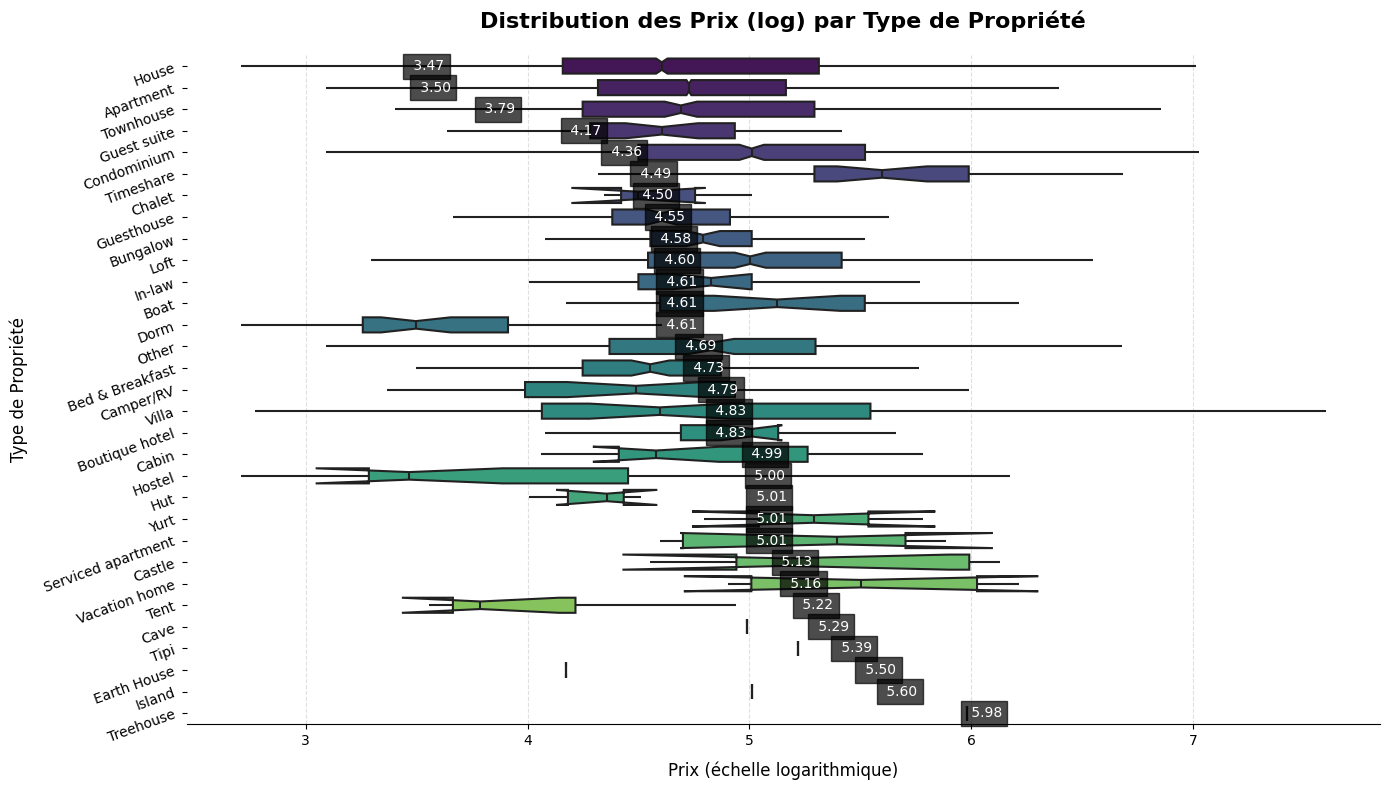

In [ ]:
plt.figure(figsize=(14, 8))

# Création du boxplot avec paramètres avancés
box = sns.boxplot(
    x='log_price',
    y='property_type',
    data=train,
    palette="viridis",
    width=0.7,
    linewidth=1.5,
    showfliers=False,
    notch=True,
    showcaps=False
)

plt.title('Distribution des Prix (log) par Type de Propriété',
          fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Prix (échelle logarithmique)', fontsize=12, labelpad=10)
plt.ylabel('Type de Propriété', fontsize=12, labelpad=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Ajouter la médiane sur chaque box
medians = train.groupby('property_type')['log_price'].median().sort_values()
for i, prop_type in enumerate(medians.index):
    plt.text(medians[prop_type], i, f' {medians[prop_type]:.2f}',
             va='center', fontsize=10, color='white',
             bbox=dict(facecolor='black', alpha=0.7))

sns.despine(left=True)
plt.grid(axis='x', linestyle='--', alpha=0.4)

if len(train['property_type'].unique()) > 5:
    plt.yticks(rotation=20)

plt.tight_layout()
plt.show()

Le boxplot nous permet de visualiser quels types de propriétés tendent à avoir des prix plus élevées ou plus faibles.

**Room type vs number of reviews**

<ipython-input-22-03237c5d0172>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='number_of_reviews',


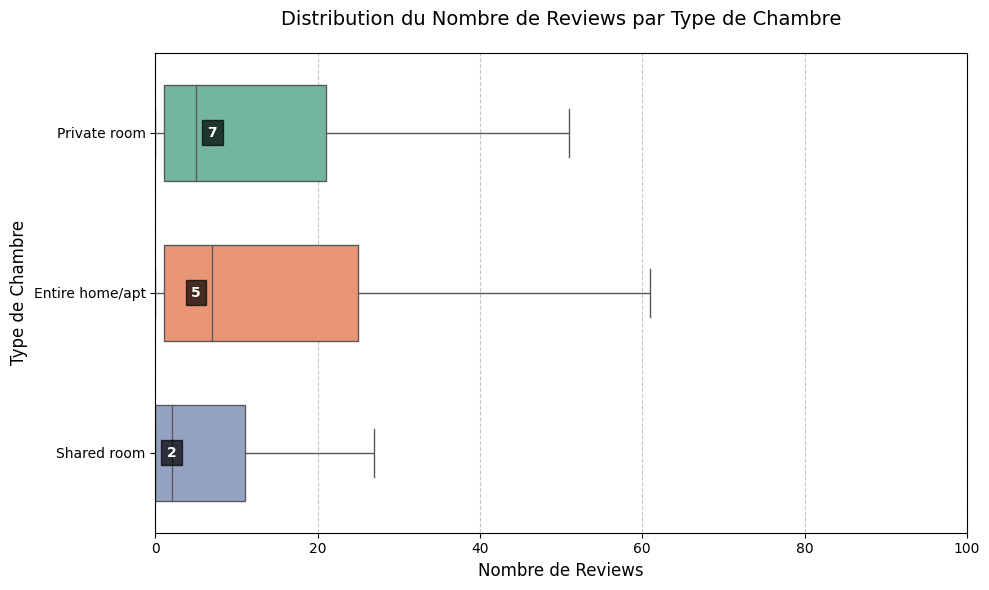

In [ ]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='number_of_reviews',
            y='room_type',
            data=train,
            palette="Set2",
            showfliers=False,  # Masque les outliers pour plus de lisibilité
            width=0.6,
            linewidth=1)

# Visualisation
plt.title('Distribution du Nombre de Reviews par Type de Chambre',
          fontsize=14, pad=20)
plt.xlabel('Nombre de Reviews', fontsize=12)
plt.ylabel('Type de Chambre', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.xlim(0, 100)

# Annotation de la médiane
medians = train.groupby('room_type')['number_of_reviews'].median()
for i, room_type in enumerate(medians.index):
    plt.text(medians[room_type], i, f'{medians[room_type]:.0f}',
             ha='center', va='center',
             fontweight='bold', color='white',
             bbox=dict(facecolor='black', alpha=0.7))

plt.tight_layout()
plt.show()

Le boxplot nous permet de visualiser si les chambres entières, privées ou partagées ont tendance à avoir plus ou moins d'avis.

# ------------------------------------ PRE-TRAITEMENT DES DONNEES------------------------------------

##Chargement des données

In [ ]:
train = pd.read_csv('airbnb_train.csv')
test = pd.read_csv('airbnb_test.csv')

##Analyse des valeurs manquantes

**Pourcentage de valeurs manquantes par colonne**

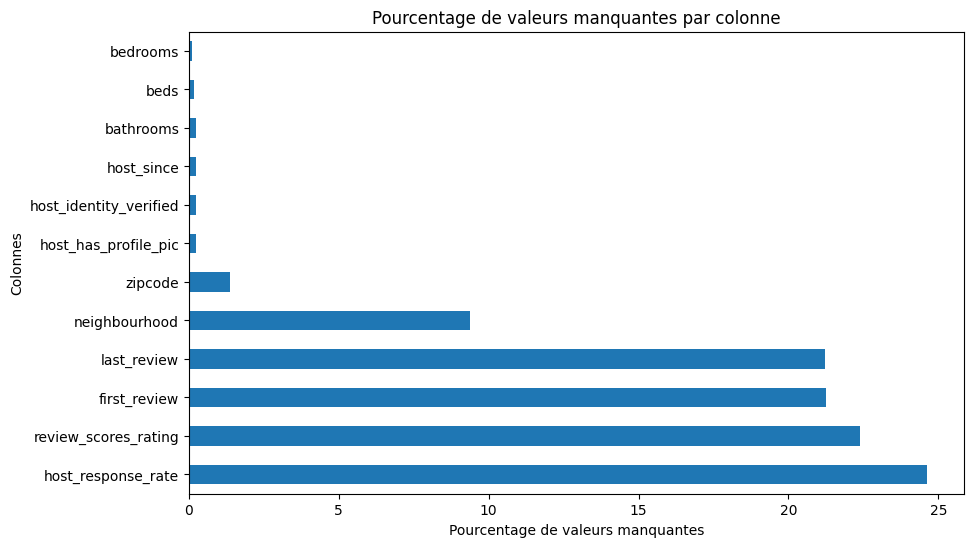

In [ ]:
#affichage du pourcentage de valeurs manquantes par colonnes
valeurs_manquantes = train.isnull().mean() * 100
valeurs_manquantes_pourcentage = valeurs_manquantes[valeurs_manquantes > 0].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
valeurs_manquantes_pourcentage.plot(kind='barh')
plt.title('Pourcentage de valeurs manquantes par colonne')
plt.xlabel('Pourcentage de valeurs manquantes')
plt.ylabel('Colonnes')
plt.show()

**Comptage du nombre de valeurs manquantes par colonne**

In [ ]:
train.isna().sum()

,0
id,0
log_price,0
property_type,0
room_type,0
amenities,0
accommodates,0
bathrooms,51
bed_type,0
cancellation_policy,0
cleaning_fee,0


##Traitement des valeurs manquantes

**Remplissage des variables numériques**

In [ ]:
#on remplace les valeurs nulles par la médiane
train['bathrooms'] = train['bathrooms'].fillna(train['bathrooms'].median())
train['bedrooms'] = train['bedrooms'].fillna(train['bedrooms'].median())
train['beds'] = train['beds'].fillna(train['beds'].median())

#pour les notes, on remplace les valeurs nulles par 0
train['review_scores_rating'] = train['review_scores_rating'].fillna(0)

**Remplissage des variables catégorielles binaires**

In [ ]:
#variables binaires/textuelles
train['host_has_profile_pic'] = train['host_has_profile_pic'].fillna('missing')
train['host_identity_verified'] = train['host_identity_verified'].fillna('missing')

##Conversion de dates et création de nouvelles variables temporelles

**Conversion en datetime**

In [ ]:
#conversion en datetime
train['host_since'] = pd.to_datetime(train['host_since'])
train['first_review'] = pd.to_datetime(train['first_review'])
train['last_review'] = pd.to_datetime(train['last_review'])

**Transformation du taux de réponse**

In [ ]:
if train['host_response_rate'].dtype == object:
    train['host_response_rate'] = train['host_response_rate'].astype(str)
    # Enlever les % et convertir en float
    train['host_response_rate'] = train['host_response_rate'].str.replace('%', '', regex=False)
    # Gérer les valeurs non numériques
    train['host_response_rate'] = pd.to_numeric(train['host_response_rate'], errors='coerce')
else:
    # Si déjà numérique, pas besoin de conversion
    pass

# Puis remplir les NA
train['host_response_rate'] = train['host_response_rate'].fillna(train['host_response_rate'].median())
# zipcode
train['zipcode'] = train['zipcode'].fillna('00000')

##Création de variables dérivées basées sur les dates

In [ ]:
# Créer des indicateurs de présence
train['has_first_review'] = train['first_review'].notnull().astype(int)
train['has_last_review'] = train['last_review'].notnull().astype(int)
train['has_host_since'] = train['host_since'].notnull().astype(int)

# Calculer la durée en jours (en remplissant les NA par -1)
train['host_duration_days'] = (pd.to_datetime('today') - pd.to_datetime(train['host_since'])).dt.days
train['host_duration_days'] = train['host_duration_days'].fillna(-1)

# Pour les reviews, créer une durée entre premier et dernier review
train['review_period_days'] = (pd.to_datetime(train['last_review']) - pd.to_datetime(train['first_review'])).dt.days
train['review_period_days'] = train['review_period_days'].fillna(-1)

# Compter le nombre de jours depuis le dernier review
train['days_since_last_review'] = (pd.to_datetime('today') - pd.to_datetime(train['last_review'])).dt.days
train['days_since_last_review'] = train['days_since_last_review'].fillna(-1)

# Maintenant on peut supprimer les colonnes originales
train.drop(['first_review', 'last_review', 'host_since'], axis=1, inplace=True)

In [ ]:
train['neighbourhood'] = train['neighbourhood'].fillna('Unknown')

**Vérification**

In [ ]:
# Vérification
if train.isnull().sum().sum() == 0:
    print("Toutes les valeurs manquantes ont été traitées avec succès!")
else:
    print("Il reste des valeurs manquantes dans les colonnes suivantes:")
    print(train.isnull().sum()[train.isnull().sum() > 0])

# Sauvegarde
train.to_csv('airbnb_train_cleaned.csv', index=False)

Toutes les valeurs manquantes ont été traitées avec succès!


**Sauvegarde du dataset nettoyé**

In [ ]:
train = pd.read_csv('airbnb_train_cleaned.csv')


##Encodage des variables catégorielles

In [ ]:
cols_to_label_encode = ['property_type', 'room_type', 'bed_type',
                       'cancellation_policy', 'host_has_profile_pic',
                       'host_identity_verified', 'instant_bookable']

for col in cols_to_label_encode:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col])

In [ ]:
train['city'] = LabelEncoder().fit_transform(train['city'])
train['neighbourhood'] = LabelEncoder().fit_transform(train['neighbourhood'])

##Traitement des amenities

In [ ]:
import re

# 1. Nettoyer et parser chaque ligne de "amenities" pour extraire tous les éléments entre guillemets
def extract_amenities(text):
    if pd.isnull(text):
        return []
    return re.findall(r'"([^"]+)"', text)

train['amenities_list'] = train['amenities'].apply(extract_amenities)

# 2. Créer l'ensemble de tous les équipements
all_amenities = set()
for items in train['amenities_list']:
    all_amenities.update([a.lower().replace(" ", "_") for a in items])

# 3. Créer une colonne binaire pour chaque équipement
for amenity in all_amenities:
    train[f'has_{amenity}'] = train['amenities_list'].apply(
        lambda x: int(amenity.replace("_", " ") in [a.lower() for a in x])
    )

# 4. Supprimer les anciennes colonnes
train.drop(['amenities', 'amenities_list'], axis=1, inplace=True)


<ipython-input-36-e2fbe05374d4>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[f'has_{amenity}'] = train['amenities_list'].apply(
<ipython-input-36-e2fbe05374d4>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[f'has_{amenity}'] = train['amenities_list'].apply(
<ipython-input-36-e2fbe05374d4>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To 

##Traitement de la description

In [ ]:
train['description_length'] = train['description'].str.len().fillna(0)
train['word_count'] = train['description'].str.split().str.len().fillna(0)
train.drop('description', axis=1, inplace=True)

<ipython-input-37-200c76b71927>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train['description_length'] = train['description'].str.len().fillna(0)
<ipython-input-37-200c76b71927>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train['word_count'] = train['description'].str.split().str.len().fillna(0)


##Traitmement des variables temporelles

In [ ]:
# Liste des colonnes de date potentielles
potential_date_cols = ['host_since', 'first_review', 'last_review']

# Filtrer pour ne garder que celles qui existent
date_cols = [col for col in potential_date_cols if col in train.columns]

if not date_cols:
    print("Aucune colonne de date trouvée - étape ignorée")
else:
    for col in date_cols:
        # Conversion en datetime
        train[col] = pd.to_datetime(train[col])

        # Calcul du nombre de jours depuis la date
        train[f'days_since_{col}'] = (pd.Timestamp.now() - train[col]).dt.days

        # Suppression de la colonne originale
        train.drop(col, axis=1, inplace=True)

    print(f"Colonnes de date traitées: {date_cols}")

Aucune colonne de date trouvée - étape ignorée


##Standarisation des variables numériques

In [ ]:
num_cols = ['accommodates', 'bathrooms', 'bedrooms', 'beds',
           'number_of_reviews', 'review_scores_rating',
           'latitude', 'longitude']

scaler = StandardScaler()
train[num_cols] = scaler.fit_transform(train[num_cols])

##Création de nouvelles variables numériques dérivées

In [ ]:
# Création de nouvelles variables
train['bed_per_person'] = train['beds'] / train['accommodates']
train['bathroom_per_person'] = train['bathrooms'] / train['accommodates']
train['total_rooms'] = train['bedrooms'] + train['bathrooms']

<ipython-input-40-1812c5d00b64>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train['bed_per_person'] = train['beds'] / train['accommodates']
<ipython-input-40-1812c5d00b64>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train['bathroom_per_person'] = train['bathrooms'] / train['accommodates']
<ipython-input-40-1812c5d00b64>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat

In [ ]:
train['cleaning_fee'] = train['cleaning_fee'].astype(int)

##Nettoyage complet du dataset

In [ ]:
# Colonnes à supprimer
cols_to_drop = ['id', 'name', 'zipcode']  # Non informatives
train.drop(cols_to_drop, axis=1, inplace=True)

# Vérification finale
print("Colonnes finales:", train.columns.tolist())
print("Shape final:", train.shape)

Colonnes finales: ['log_price', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city', 'host_has_profile_pic', 'host_identity_verified', 'host_response_rate', 'instant_bookable', 'latitude', 'longitude', 'neighbourhood', 'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds', 'has_first_review', 'has_last_review', 'has_host_since', 'host_duration_days', 'review_period_days', 'days_since_last_review', 'has_cleaning_before_checkout', 'has_wide_doorway', 'has_wide_entryway', 'has_extra_pillows_and_blankets', 'has_wide_clearance_to_bed', 'has_firm_mattress', 'has_stair_gates', 'has_single_level_home', 'has_room-darkening_shades', 'has_handheld_shower_head', 'has_smart_lock', 'has_baby_monitor', 'has_changing_table', 'has_paid_parking_off_premises', 'has_roll-in_shower_with_chair', 'has_children’s_dinnerware', 'has_flat,_smooth_pathway_to_front_door', 'has_bed_linens', 'has_wide_hallway_clearance', 'has_long_term_stays_

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22234 entries, 0 to 22233
Columns: 124 entries, log_price to total_rooms
dtypes: float64(16), int64(108)
memory usage: 21.0 MB


Ici on réalise un nettoyage complet des données de train en filtrant les valeurs rares ou extrêmes, en supprimant les données manquantes, et en préparant les variables pour l’entraînement.

In [ ]:
# Configurations
enable_separate_features = 0
enable_separate_amenities = 0

########################################################
############ Location Features #############

# City
train = train.groupby("city").filter(lambda x: len(x) > 10)
train = train[~pd.isnull(train["city"])]

# Neighbourhood
train = train.groupby("neighbourhood").filter(lambda x: len(x) > 10)
train = train[~pd.isnull(train["neighbourhood"])]

########################################################
############ Property Features #############

# Property Type
train = train.groupby("property_type").filter(lambda x: len(x) >= 10)
train = train[~pd.isnull(train["property_type"])]

# Room Type
train = train[~pd.isnull(train["room_type"])]

# Bed Type
train = train[~pd.isnull(train["bed_type"])]

# Accommodates
train = train[~pd.isnull(train["accommodates"])]
train = train[train["accommodates"] <= 16]

# Bedrooms
train = train[~pd.isnull(train["bedrooms"])]
train = train[train["bedrooms"] <= 10]

# Beds
train = train[~pd.isnull(train["beds"])]
train = train[train["beds"] <= 16]

# Bathrooms
train = train[~pd.isnull(train["bathrooms"])]

# Cancellation Policy
exclude_cancellation_policy_list = ["long_term", "no_refunds"]
train = train[~train["cancellation_policy"].isin(exclude_cancellation_policy_list)]
train = train[~pd.isnull(train["cancellation_policy"])]

########################################################
############ Reviews #############

# Number of Reviews
train = train[train["number_of_reviews"] > 0]
train = train[~pd.isnull(train["number_of_reviews"])]

# Review Scores
train = train[~pd.isnull(train["review_scores_rating"])]

########################################################
############ Host Features #############


# Host Response Rate - nettoyage et conversion
train["host_response_rate"] = train["host_response_rate"].astype(str)
train["host_response_rate"] = train["host_response_rate"].str.replace('%', '', regex=False)
train["host_response_rate"] = pd.to_numeric(train["host_response_rate"], errors='coerce')
train["host_response_rate"] = train["host_response_rate"].fillna(train["host_response_rate"].mean())

# Host Profile Pics et Identity Verified
train["host_has_profile_pic"] = train["host_has_profile_pic"].fillna("missing")
train["host_identity_verified"] = train["host_identity_verified"].fillna("missing")

########################################################
############ Amenities & Features #############

if enable_separate_amenities == 1:
    from sklearn.preprocessing import MultiLabelBinarizer

    # Nettoyage des chaînes d'amenities
    def clean_amenities(s):
        try:
            s = s.strip('{}')
            items = [item.strip().strip('"') for item in s.split(',')]
            return items
        except:
            return []

    train['amenities_cleaned'] = train['amenities'].apply(clean_amenities)

    # Encodage one-hot
    mlb = MultiLabelBinarizer()
    amenities_encoded = mlb.fit_transform(train['amenities_cleaned'])

    # Créer DataFrame des colonnes
    df_amenities = pd.DataFrame(amenities_encoded, columns=[f'has_{a.lower().replace(" ", "_").replace("-", "_")}' for a in mlb.classes_], index=train.index)

    # Fusionner
    train = pd.concat([train.drop(columns=['amenities', 'amenities_cleaned']), df_amenities], axis=1)
else:
    train = train.drop(columns=['amenities'], errors='ignore')


train = train[~pd.isnull(train["log_price"])]
train = train[train["log_price"] > 0]


# Vérifications finales
print("Colonnes finales:", train.columns.tolist())
print("Shape final:", train.shape)
print("Valeurs manquantes restantes:", train.isnull().sum().sum())


Colonnes finales: ['log_price', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city', 'host_has_profile_pic', 'host_identity_verified', 'host_response_rate', 'instant_bookable', 'latitude', 'longitude', 'neighbourhood', 'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds', 'has_first_review', 'has_last_review', 'has_host_since', 'host_duration_days', 'review_period_days', 'days_since_last_review', 'has_cleaning_before_checkout', 'has_wide_doorway', 'has_wide_entryway', 'has_extra_pillows_and_blankets', 'has_wide_clearance_to_bed', 'has_firm_mattress', 'has_stair_gates', 'has_single_level_home', 'has_room-darkening_shades', 'has_handheld_shower_head', 'has_smart_lock', 'has_baby_monitor', 'has_changing_table', 'has_paid_parking_off_premises', 'has_roll-in_shower_with_chair', 'has_children’s_dinnerware', 'has_flat,_smooth_pathway_to_front_door', 'has_bed_linens', 'has_wide_hallway_clearance', 'has_long_term_stays_

## Split en train et test

In [ ]:
X = train.drop(columns=['log_price'])
y = train['log_price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------MODELISATION-----------------------------

## Feature engineering

In [ ]:
class FeatureAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()

        # Éviter divisions par 0
        X['bedroom_per_person'] = X['bedrooms'] / (X['accommodates'] + 1e-3)
        X['host_duration_years'] = X['host_duration_days'] / 365
        X['room_density'] = X['total_rooms'] / (X['accommodates'] + 1e-3)
        X['beds_per_bedroom'] = X['beds'] / (X['bedrooms'] + 1e-3)
        X['review_rate_per_day'] = X['number_of_reviews'] / (X['review_period_days'] + 1e-3)
        X['reviews_per_host_year'] = X['number_of_reviews'] / (X['host_duration_days'] / 365 + 1e-3)
        X['lat_lon_ratio'] = X['latitude'] / (X['longitude'] + 1e-3)


        X['host_response_score'] = (
            X['host_response_rate'] * X['host_identity_verified'] * X['host_has_profile_pic']
        )
        X['has_full_host_info'] = (
            (X['host_response_rate'] > 0.9).astype(int)
            * X['host_identity_verified']
            * X['host_has_profile_pic']
        )

        equip_cols = [col for col in X.columns if col.startswith("has_")]
        X['total_amenities'] = X[equip_cols].sum(axis=1)
        X['amenities_density'] = X['total_amenities'] / (X['total_rooms'] + 1e-3)
        X['has_full_basics'] = X[['has_pocket_wifi', 'has_cable_tv', 'has_wireless_internet', 'has_hot_water','has_air_conditioning', 'has_cooking_basics']].sum(axis=1)

        return X



## Pipeline de preprocessing

In [ ]:
numeric_features = X_train.columns.tolist()

numeric_pipeline = Pipeline([
    ('feature_adder', FeatureAdder()),
    ('scaler', StandardScaler())
])

preprocessing_pipeline = ColumnTransformer([
    ('num', numeric_pipeline, numeric_features)
])

pipeline_linreg = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('linear_model', LinearRegression())
])


# Test de plusieurs modèles : Régression linéaire avec PCA, GradientBoosting, XGBoost, Arbres de décisions et SVR

## Pipeline avec multiples choix

Ici, on teste plusieurs modèles pour identifier le plus performant :

**Régression linéaire + ACP** : Modèle simple qui suppose une relation linéaire. L’ACP réduit la dimensionnalité pour éviter le surapprentissage.

**Gradient Boosting** : Combine plusieurs arbres faibles pour corriger les erreurs et améliorer la précision. Très performant mais sensible aux réglages.

**Arbre de décision** : Modèle simple et interprétable qui divise les données selon des règles logiques.

**SVM**: Modèle efficace pour les petites données, qui cherche à minimiser les erreurs tout en gardant une fonction stable.

**XGBoost** : Version optimisée du Gradient Boosting, plus rapide et régularisée pour de meilleures performances.



Au cours de l’optimisation des hyperparamètres, nous avons d’abord utilisé une approche par RandomizedSearchCV afin d’explorer rapidement un large espace de paramètres. Cette méthode nous a permis d’identifier des zones prometteuses du paramètre space, tout en limitant le temps de calcul. Dans un second temps, nous avons affiné cette recherche à l’aide de GridSearchCV, en testant de manière exhaustive plusieurs combinaisons autour des meilleurs paramètres trouvés précédemment. Bien que cette méthode soit nettement plus coûteuse en temps de calcul, elle a permis d’obtenir un réglage plus précis du modèle et donc de meilleurs résultats en termes de performance.

In [ ]:
pipelines = {
    'LinearRegression + PCA': Pipeline([
        ('preprocessing', preprocessing_pipeline),
        ('pca', PCA()),
        ('regressor', LinearRegression())
    ]),
    'GradientBoosting': Pipeline([
        ('preprocessing', preprocessing_pipeline),
        ('regressor', GradientBoostingRegressor())
    ]),
    'DecisionTree': Pipeline([
        ('preprocessing', preprocessing_pipeline),
        ('regressor', DecisionTreeRegressor())
    ]),
    'SVM': Pipeline([
        ('preprocessing', preprocessing_pipeline),
        ('regressor', SVR())
    ])
}
# XGBoost
pipelines['XGBoost'] = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('regressor', XGBRegressor(objective='reg:squarederror', verbosity=0))
])


# Grille d'hyperparamètres
param_grids = {
    'LinearRegression + PCA': {
        'pca__n_components': [0.90, 0.95, 0.99]
    },

    'GradientBoosting': {
        'regressor__n_estimators': [100, 200, 300],
        'regressor__learning_rate': [0.05, 0.1, 0.001],
        'regressor__max_depth': [3, 5],
        'regressor__random_state': [42]
    },

    'DecisionTree': {
        'regressor__max_depth': [10, 20,30],
        'regressor__min_samples_split': [2, 5,7],
        'regressor__max_features': ['sqrt', None],
        'regressor__random_state': [42]
    },

    'SVM': {
        'regressor__C': [1, 10],
        'regressor__epsilon': [0.1, 0.2,0.01],
        'regressor__gamma': ['scale', 0.1]
    },

    'XGBoost': {
        'regressor__n_estimators': [100, 200,300],
        'regressor__learning_rate': [0.05, 0.1,0.001],
        'regressor__max_depth': [3, 5],
        'regressor__subsample': [0.8],
        'regressor__colsample_bytree': [1.0],
        'regressor__random_state': [42]
    }
}



# Entraînement et évaluation
results = {}

for name, pipeline in pipelines.items():
    print(f"⏳ Modèle en cours : {name}")
    grid_search = GridSearchCV(pipeline, param_grids[name], cv=5,
                               scoring='neg_mean_squared_error', n_jobs=-1)

    rand_search = RandomizedSearchCV(pipeline, param_distributions=param_grids[name],
                            n_iter=30,  # nombre d'essais aléatoires
                            cv=3,
                            scoring='neg_mean_squared_error',
                            n_jobs=-1,
                            random_state=42)

    start_time = time.time()
    # Prend plus de temps
    grid_search.fit(X_train, y_train)

    # Pour gagner du temps
    #rand_search.fit(X_train, y_train)
    elapsed_time = time.time() - start_time

    best_model = grid_search.best_estimator_
    #best_model = rand_search.best_estimator_
    y_pred = best_model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        'Best Params': grid_search.best_params_,
        #'Best Params': rand_search.best_params_,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2,
        'Train Time (s)': round(elapsed_time, 2)
    }



⏳ Modèle en cours : LinearRegression + PCA
⏳ Modèle en cours : GradientBoosting
⏳ Modèle en cours : DecisionTree
⏳ Modèle en cours : SVM
⏳ Modèle en cours : XGBoost


In [ ]:
# Affichage des résultats
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by='R2', ascending=False)
print(results_df)

                                                              Best Params  \
XGBoost                 {'regressor__colsample_bytree': 1.0, 'regresso...   
GradientBoosting        {'regressor__learning_rate': 0.1, 'regressor__...   
LinearRegression + PCA                        {'pca__n_components': 0.99}   
SVM                     {'regressor__C': 1, 'regressor__epsilon': 0.2,...   
DecisionTree            {'regressor__max_depth': 10, 'regressor__max_f...   

                            RMSE       MAE        R2 Train Time (s)  
XGBoost                 0.297598  0.217929  0.748638          58.75  
GradientBoosting          0.2992  0.220776  0.745926         519.36  
LinearRegression + PCA  0.367805  0.277778  0.616051           3.24  
SVM                     0.371563  0.275503  0.608164         131.25  
DecisionTree            0.396868  0.284826  0.552975            8.7  


Comparaison des RMSE et R2 des différents modèles

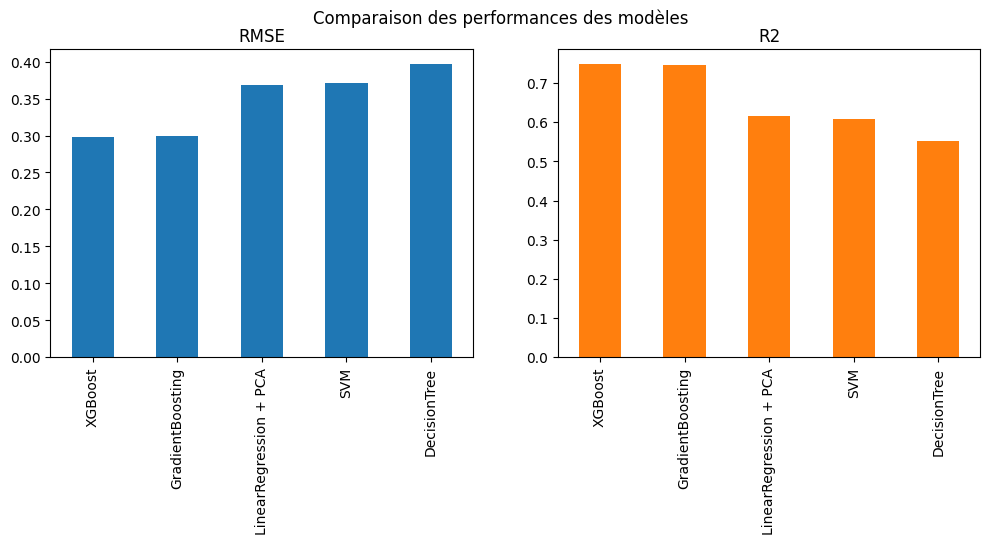

In [ ]:
results_df[['RMSE', 'R2']].plot(kind='bar', subplots=True, layout=(1, 2), figsize=(12,4), legend=False)
plt.suptitle("Comparaison des performances des modèles")
plt.show()

XGBoost s’est révélé être le meilleur modèle, atteignant un score de R² de 0.75. Ce modèle se distingue par sa capacité à capturer des relations complexes entre les nombreuses variables du dataset, tout en gérant efficacement les données hétérogènes et les valeurs manquantes. Grâce à son fonctionnement en boosting de gradient, XGBoost corrige les erreurs des arbres précédents à chaque itération, ce qui améliore progressivement la précision des prédictions. Sa robustesse face à l’overfitting, son efficacité en termes de calcul, et sa capacité à modéliser des interactions non linéaires en font un choix particulièrement adapté à notre problème.

### Visualisation

**Histogramme des prédictions vs histogramme des vraies valeurs**

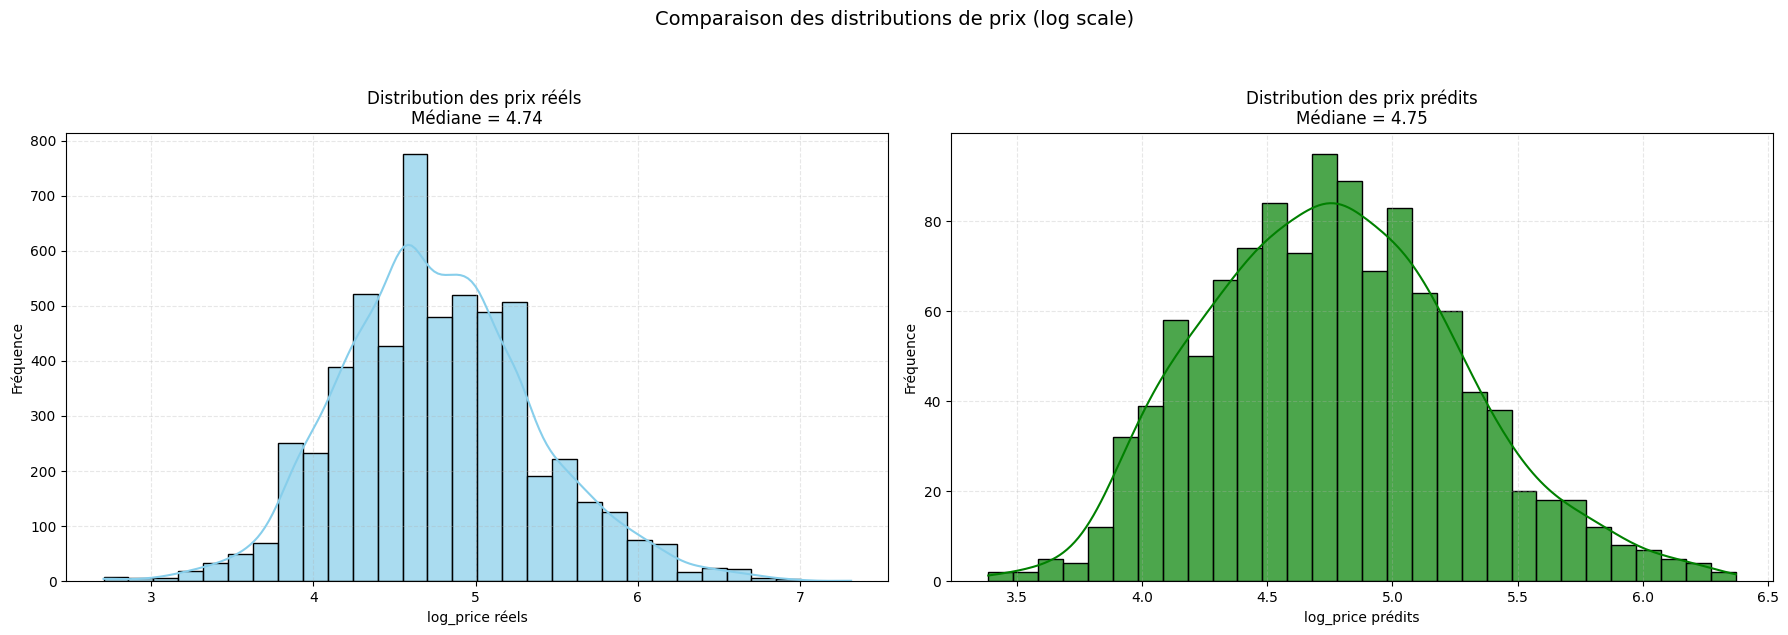

In [ ]:
plt.figure(figsize=(18, 6))

# Graphique 1 - Distribution des vraies valeurs
plt.subplot(1, 2, 1)
sns.histplot(y, bins=30, kde=True, color='skyblue', alpha=0.7)
plt.title('Distribution des prix rééls \nMédiane = {:.2f}'.format(np.median(y)))
plt.xlabel('log_price réels')
plt.ylabel('Fréquence')
plt.grid(True, linestyle='--', alpha=0.3)

# Graphique 2 - Distribution des prédictions
plt.subplot(1, 2, 2)
sns.histplot(y_pred, bins=30, kde=True, color='green', alpha=0.7)
plt.title('Distribution des prix prédits\nMédiane = {:.2f}'.format(np.median(y_pred)))
plt.xlabel('log_price prédits')
plt.ylabel('Fréquence')
plt.grid(True, linestyle='--', alpha=0.3)

plt.suptitle('Comparaison des distributions de prix (log scale)', fontsize=14, y=1.05)
plt.tight_layout()
plt.show()

La figure ci-dessus compare la distribution des prix réels (log_price) sur le jeu d’entraînement avec celle des prix prédits par le modèle. On observe que les deux distributions ont des médianes très proches (4.74 pour les prix réels, 4.75 pour les prix prédits), ce qui suggère que le modèle a appris à prédire correctement la tendance centrale des données. Cependant, les formes des distributions présentent quelques différences. La distribution réelle est légèrement plus asymétrique, avec une concentration plus marquée autour de la valeur modale, tandis que la distribution prédite semble plus lissée et symétrique. Cela peut indiquer que le modèle a tendance à "lisser" les extrêmes et à sous-estimer les variations locales ou les valeurs atypiques. Malgré cela, la proximité des médianes et la forme générale similaire des deux courbes suggèrent une bonne capacité du modèle à capturer la structure globale des données, tout en restant perfectible sur la prédiction des cas particuliers.



**Scatter plot des valeurs réels vs les valeurs prédites**

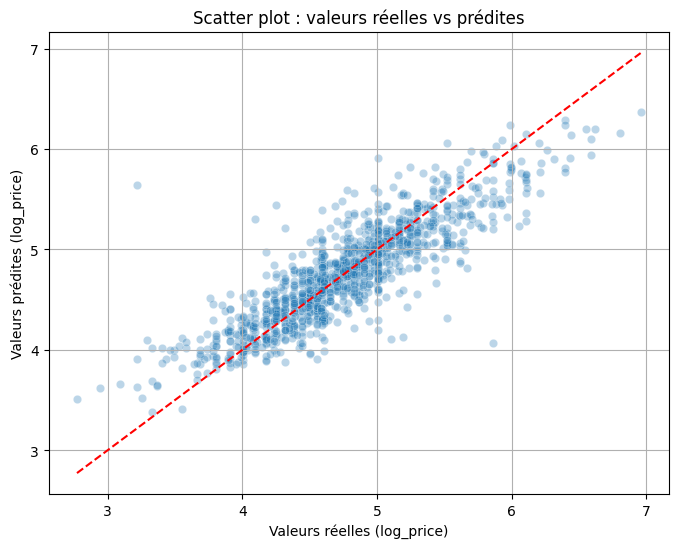

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ligne idéale
plt.xlabel("Valeurs réelles (log_price)")
plt.ylabel("Valeurs prédites (log_price)")
plt.title("Scatter plot : valeurs réelles vs prédites")
plt.grid(True)
plt.show()


Ce scatter plot révèle que le modèle prédit correctement les prix élevés (log_price entre 5 et 7), avec un bon alignement entre valeurs réelles et prédites. En revanche, des écarts significatifs apparaissent pour les prix bas (autour de 3), où le modèle semble sous-estimer les valeurs réelles.

# Prédiction sur le fichier airbnb_test

Dans cette partie, nous allons prédire le prix des logements du fichier airbnb_test

In [ ]:
test = pd.read_csv('airbnb_test.csv')

## Pré-traitement des données



C'est le même traitement des données manquantes que train

In [ ]:
test.isna().sum()

,0
Unnamed: 0,0
property_type,0
room_type,0
amenities,0
accommodates,0
bathrooms,149
bed_type,0
cancellation_policy,0
cleaning_fee,0
city,0


In [ ]:
# on remplace les valeurs nulles par la médiane
test['bathrooms'] = test['bathrooms'].fillna(test['bathrooms'].median())
test['bedrooms'] = test['bedrooms'].fillna(test['bedrooms'].median())
test['beds'] = test['beds'].fillna(test['beds'].median())

# pour les notes, on remplace les valeurs nulles par 0
test['review_scores_rating'] = test['review_scores_rating'].fillna(0)

In [ ]:
# variables binaires/textuelles
test['host_has_profile_pic'] = test['host_has_profile_pic'].fillna('missing')
test['host_identity_verified'] = test['host_identity_verified'].fillna('missing')

In [ ]:
# conversion en datetime
test['host_since'] = pd.to_datetime(test['host_since'])
test['first_review'] = pd.to_datetime(test['first_review'])
test['last_review'] = pd.to_datetime(test['last_review'])

In [ ]:
if test['host_response_rate'].dtype == object:
    test['host_response_rate'] = test['host_response_rate'].astype(str)
    # Enlever les % et convertir en float
    test['host_response_rate'] = test['host_response_rate'].str.replace('%', '', regex=False)
    # Gérer les valeurs non numériques
    test['host_response_rate'] = pd.to_numeric(test['host_response_rate'], errors='coerce')
else:
    # Si déjà numérique, pas besoin de conversion
    pass

# Puis remplir les NA
test['host_response_rate'] = test['host_response_rate'].fillna(test['host_response_rate'].median())

# zipcode
test['zipcode'] = test['zipcode'].fillna('00000')

In [ ]:
# Créer des indicateurs de présence
test['has_first_review'] = test['first_review'].notnull().astype(int)
test['has_last_review'] = test['last_review'].notnull().astype(int)
test['has_host_since'] = test['host_since'].notnull().astype(int)

# Calculer la durée en jours (en remplissant les NA par -1)
test['host_duration_days'] = (pd.to_datetime('today') - pd.to_datetime(test['host_since'])).dt.days
test['host_duration_days'] = test['host_duration_days'].fillna(-1)

# Pour les reviews, créer une durée entre premier et dernier review
test['review_period_days'] = (pd.to_datetime(test['last_review']) - pd.to_datetime(test['first_review'])).dt.days
test['review_period_days'] = test['review_period_days'].fillna(-1)

# Compter le nombre de jours depuis le dernier review
test['days_since_last_review'] = (pd.to_datetime('today') - pd.to_datetime(test['last_review'])).dt.days
test['days_since_last_review'] = test['days_since_last_review'].fillna(-1)

# Maintenant vous pouvez supprimer les colonnes originales si besoin
test.drop(['first_review', 'last_review', 'host_since'], axis=1, inplace=True)


In [ ]:
test['neighbourhood'] = test['neighbourhood'].fillna('Unknown')

In [ ]:
# Vérification
if test.isnull().sum().sum() == 0:
    print("Toutes les valeurs manquantes ont été traitées avec succès!")
else:
    print("Il reste des valeurs manquantes dans les colonnes suivantes:")
    print(test.isnull().sum()[test.isnull().sum() > 0])

# Sauvegarde
test.to_csv('airbnb_test_cleaned.csv', index=False)


Toutes les valeurs manquantes ont été traitées avec succès!


In [ ]:
test = pd.read_csv('airbnb_test_cleaned.csv')

In [ ]:
cols_to_label_encode = ['property_type', 'room_type', 'bed_type',
                       'cancellation_policy', 'host_has_profile_pic',
                       'host_identity_verified', 'instant_bookable']

for col in cols_to_label_encode:
    le = LabelEncoder()
    test[col] = le.fit_transform(test[col])

In [ ]:
test['city'] = LabelEncoder().fit_transform(test['city'])
test['neighbourhood'] = LabelEncoder().fit_transform(test['neighbourhood'])

In [ ]:
import re

# 1. Nettoyer et parser chaque ligne de "amenities" pour extraire tous les éléments entre guillemets
def extract_amenities(text):
    if pd.isnull(text):
        return []
    return re.findall(r'"([^"]+)"', text)

test['amenities_list'] = test['amenities'].apply(extract_amenities)

# 2. Créer l'ensemble de tous les équipements
all_amenities = set()
for items in test['amenities_list']:
    all_amenities.update([a.lower().replace(" ", "_") for a in items])

# 3. Créer une colonne binaire pour chaque équipement
for amenity in all_amenities:
    test[f'has_{amenity}'] = test['amenities_list'].apply(
        lambda x: int(amenity.replace("_", " ") in [a.lower() for a in x])
    )

# 4. Supprimer les anciennes colonnes
test.drop(['amenities', 'amenities_list'], axis=1, inplace=True)


<ipython-input-64-f88bc0a8b872>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test[f'has_{amenity}'] = test['amenities_list'].apply(
<ipython-input-64-f88bc0a8b872>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test[f'has_{amenity}'] = test['amenities_list'].apply(
<ipython-input-64-f88bc0a8b872>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get 

In [ ]:
test['description_length'] = test['description'].str.len().fillna(0)
test['word_count'] = test['description'].str.split().str.len().fillna(0)
test.drop('description', axis=1, inplace=True)

<ipython-input-65-94c2105cd84c>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test['description_length'] = test['description'].str.len().fillna(0)
<ipython-input-65-94c2105cd84c>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test['word_count'] = test['description'].str.split().str.len().fillna(0)


In [ ]:
# Liste des colonnes de date potentielles
potential_date_cols = ['host_since', 'first_review', 'last_review']

# Filtrer pour ne garder que celles qui existent
date_cols = [col for col in potential_date_cols if col in test.columns]

if not date_cols:
    print("Aucune colonne de date trouvée - étape ignorée")
else:
    for col in date_cols:
        # Conversion en datetime
        test[col] = pd.to_datetime(test[col])

        # Calcul du nombre de jours depuis la date
        test[f'days_since_{col}'] = (pd.Timestamp.now() - test[col]).dt.days

        # Suppression de la colonne originale
        test.drop(col, axis=1, inplace=True)

    print(f"Colonnes de date traitées: {date_cols}")


Aucune colonne de date trouvée - étape ignorée


In [ ]:
num_cols = ['accommodates', 'bathrooms', 'bedrooms', 'beds',
            'number_of_reviews', 'review_scores_rating',
            'latitude', 'longitude']

scaler = StandardScaler()
test[num_cols] = scaler.fit_transform(test[num_cols])

In [ ]:
# Création de nouvelles variables
test['bed_per_person'] = test['beds'] / test['accommodates']
test['bathroom_per_person'] = test['bathrooms'] / test['accommodates']
test['total_rooms'] = test['bedrooms'] + test['bathrooms']


<ipython-input-68-74e64712a139>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test['bed_per_person'] = test['beds'] / test['accommodates']
<ipython-input-68-74e64712a139>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test['bathroom_per_person'] = test['bathrooms'] / test['accommodates']
<ipython-input-68-74e64712a139>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=

In [ ]:
test['cleaning_fee'] = test['cleaning_fee'].astype(int)

In [ ]:
# Colonnes à supprimer
test_ids = test['Unnamed: 0'].copy()
cols_to_drop = ['name', 'zipcode']  # Non informatives
test.drop(cols_to_drop, axis=1, inplace=True)

# Vérification finale
print("Colonnes finales:", test.columns.tolist())
print("Shape final:", test.shape)

Colonnes finales: ['Unnamed: 0', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city', 'host_has_profile_pic', 'host_identity_verified', 'host_response_rate', 'instant_bookable', 'latitude', 'longitude', 'neighbourhood', 'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds', 'has_first_review', 'has_last_review', 'has_host_since', 'host_duration_days', 'review_period_days', 'days_since_last_review', 'has_cleaning_before_checkout', 'has_wide_doorway', 'has_wide_entryway', 'has_extra_pillows_and_blankets', 'has_wide_clearance_to_bed', 'has_firm_mattress', 'has_stair_gates', 'has_single_level_home', 'has_room-darkening_shades', 'has_handheld_shower_head', 'has_smart_lock', 'has_baby_monitor', 'has_changing_table', 'has_paid_parking_off_premises', 'has_roll-in_shower_with_chair', 'has_children’s_dinnerware', 'has_flat,_smooth_pathway_to_front_door', 'has_bed_linens', 'has_wide_hallway_clearance', 'has_long_term_stays

## Prédiction en utilisant le meilleur modèle

In [ ]:
predictions = best_model.predict(test)

### Visualisation des prédictions

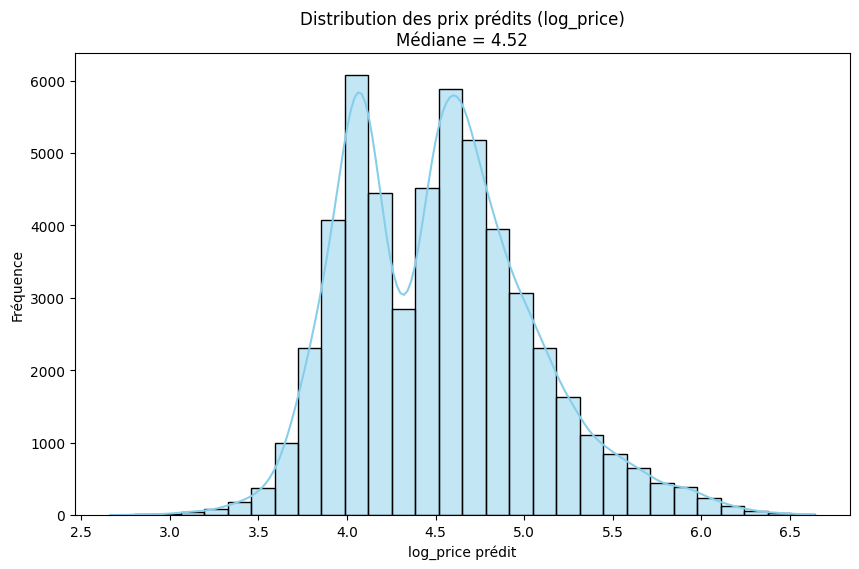

In [ ]:
# Histogrammes des prix prédits
plt.figure(figsize=(10, 6))
sns.histplot(predictions, bins=30, kde=True, color='skyblue')
plt.title('Distribution des prix prédits (log_price)\nMédiane = {:.2f}'.format(np.median(predictions)))
plt.xlabel('log_price prédit')
plt.ylabel('Fréquence')
plt.show()

La distribution des prix prédits sur le nouveau jeu de données présente une médiane réaliste de 4.52 log_price, avec une concentration majoritaire des prédictions entre 3.5 et 5.5, ce qui indique que le modèle produit des estimations cohérentes pour la grande majorité des biens. La forme asymétrique de la distribution, avec une queue plus étendue vers les hautes valeurs, reflète probablement la variabilité naturelle des prix sur le marché, où quelques propriétés haut de gamme atteignent des tarifs significativement plus élevés. L'absence notable de prédictions en dessous de 3.5 suggère soit une sous-représentation des logements économiques dans les nouvelles données, soit une prudence du modèle à extrapoler vers les extrêmes. Globalement, ces résultats confirment que le modèle maintient ses performances en situation réelle, tout en soulignant l'importance de surveiller particulièrement les cas marginaux qui pourraient nécessiter un ajustement manuel ou un réentraînement ciblé.

**Enregistrement des prédicitions**

In [ ]:
results = pd.DataFrame({
    'id': test_ids,
    'log_price': predictions
})
results.to_csv('predictions.csv', index=False)